<a href="https://colab.research.google.com/github/TracyWhitneyAkinyi/Thyroid-Machine-Learning-Analysis/blob/main/Thyroid_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import random as rnd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.simplefilter(action="ignore")

In [4]:
df= pd.read_csv("./Thyroid_Diff.csv")

In [5]:
df.head(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,Tumor,Nodes,Metastasis,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [6]:
categorical_columns = list(df.select_dtypes(include=['object']))

# Transform each categorical column
for col in categorical_columns:
    df[col] = pd.Categorical(df[col])
    df[col] = df[col].cat.codes

print(df.head())

   Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
0   27       0        0           0                0                 2   
1   34       0        0           1                0                 2   
2   30       0        0           0                0                 2   
3   62       0        0           0                0                 2   
4   62       0        0           0                0                 2   

   Physical Examination  Adenopathy  Pathology  Focality  Risk  Tumor  Nodes  \
0                     3           3          2         1     2      0      0   
1                     1           3          2         1     2      0      0   
2                     4           3          2         1     2      0      0   
3                     4           3          2         1     2      0      0   
4                     1           3          2         0     2      0      0   

   Metastasis  Stage  Response  Recurred  
0           0      0         2 

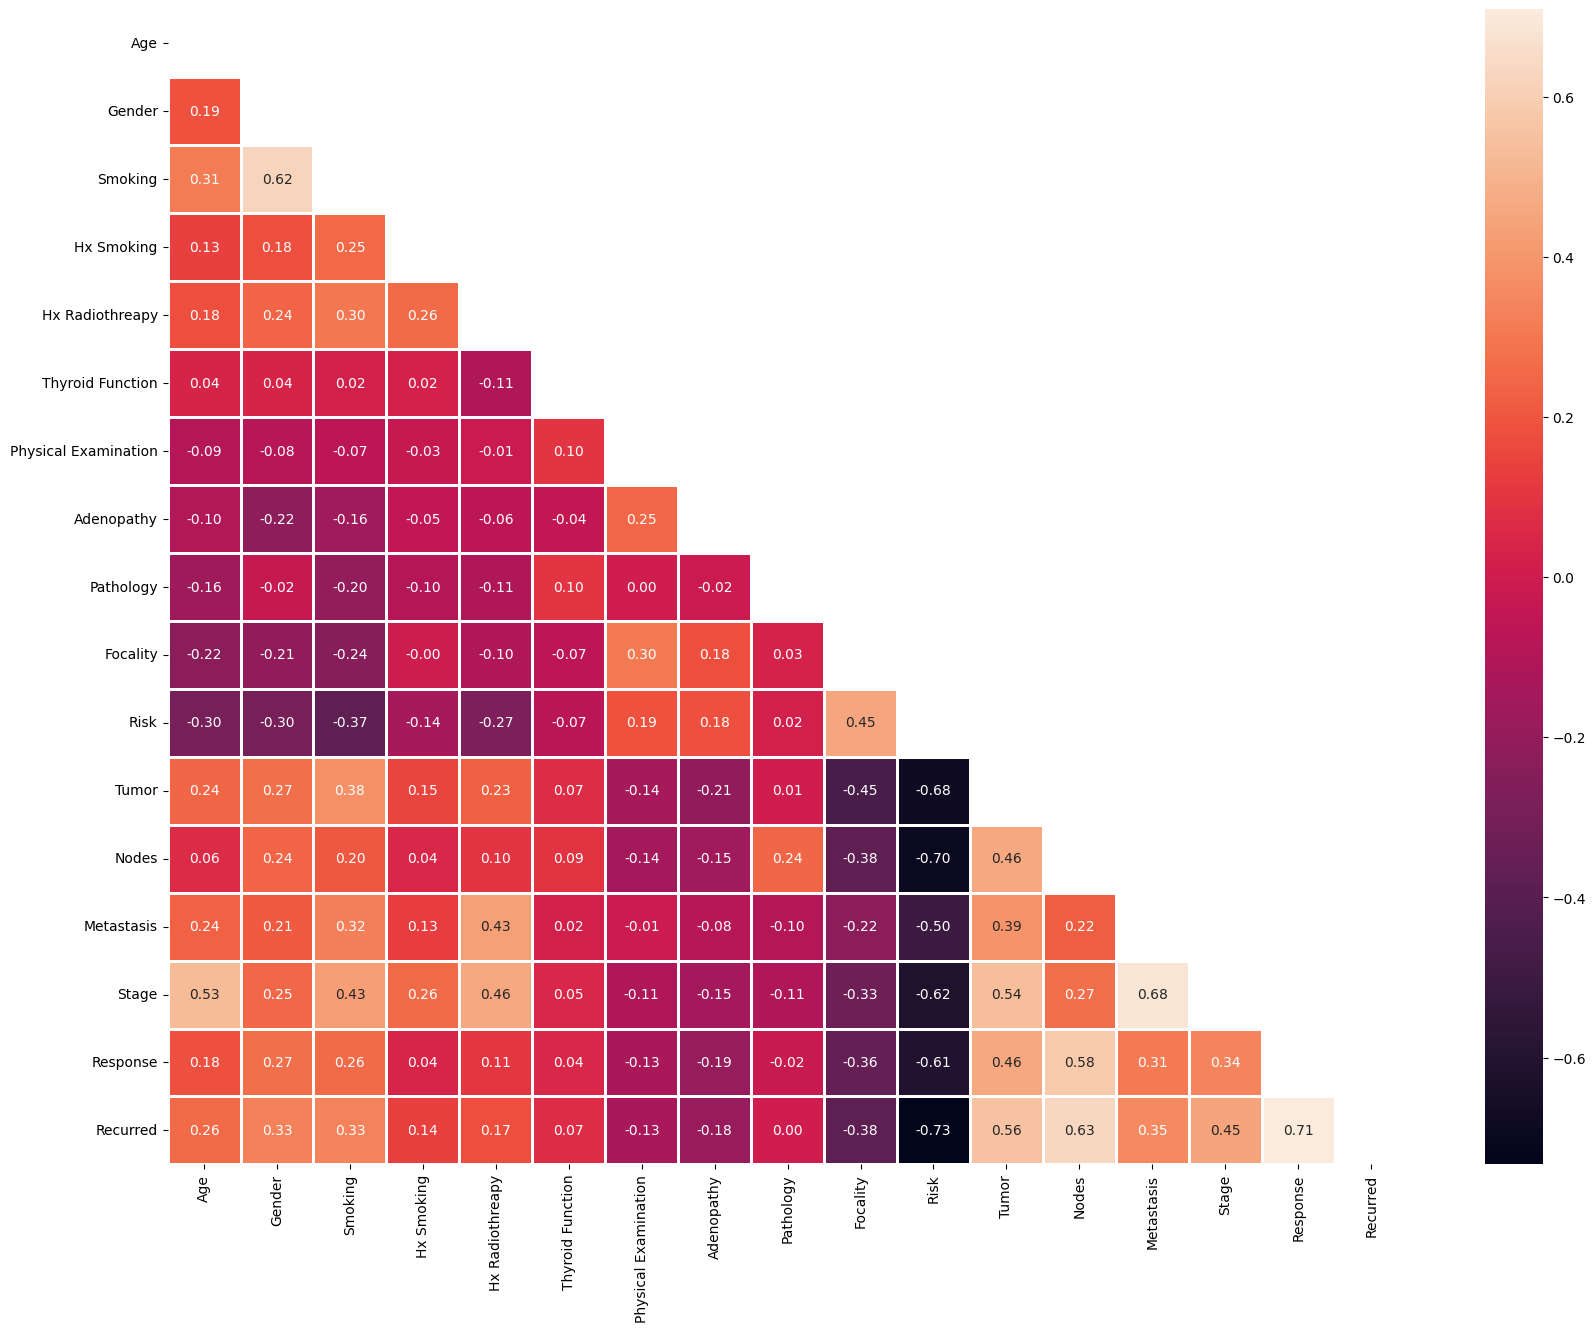

In [7]:
plt.figure(figsize=(20,15))
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))

sns.heatmap(corr,mask=mask,linewidth=1, annot=True, fmt=".2f")
plt.show()

In [8]:
#Creating features and labelling
X=df.drop(["Recurred"],axis=1)
y=df["Recurred"]

In [9]:
#Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:
import xgboost

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor

In [12]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
random_forest.fit(X_train,y_train)
y_pred=random_forest.predict(X_test)#predict the test results


In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rfa=(accuracy_score(y_test,y_pred)*100)
rfa

94.8051948051948

In [14]:
#Logistic Regression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
pc_logreg=round(logreg.score(X_train,y_train)*100,2)
pc_logreg

91.18

In [15]:
#Gaussian Naive Bayes
gaussian_nb=GaussianNB()
gaussian_nb.fit(X_train,y_train)
y_pred=gaussian_nb.predict(X_test)
pc_gaussian_nb=round(gaussian_nb.score(X_train,y_train)*100,2)
pc_gaussian_nb

89.54

In [16]:
#Support Vector Machines
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
pc_svc=round(svc.score(X_train,y_train)*100,2)
pc_svc

78.1

In [17]:
mdl=XGBClassifier()
mdl.fit(X_train,y_train)
y_pred=mdl.predict(X_test)
xgb=print(accuracy_score(y_test,y_pred)*100)

93.5064935064935


In [40]:
classifiers=['Logistic Regression','KNN','SVC','Random Forest Classifier','Gaussian Naive Bayes','XGBoost']
pred_value=[LogisticRegression(),KNeighborsClassifier(),SVC(),RandomForestClassifier(),GaussianNB(),XGBClassifier()]
models=dict(zip(classifiers,pred_value))
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict=model.predict(X_test)
    accuracy=accuracy_score(y_test,predict)*100
    print(name,accuracy)

Logistic Regression 90.9090909090909
KNN 83.11688311688312
SVC 75.32467532467533
Random Forest Classifier 93.5064935064935
Gaussian Naive Bayes 88.31168831168831
XGBoost 93.5064935064935


In [41]:
#Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        51
           1       0.92      0.88      0.90        26

    accuracy                           0.94        77
   macro avg       0.93      0.92      0.93        77
weighted avg       0.93      0.94      0.93        77



In [19]:
import eli5
from eli5.sklearn import PermutationImportance

permutation=PermutationImportance(random_forest,random_state=0).fit(X_test,y_test)
eli5.show_weights(permutation,feature_names=X_test.columns.tolist())

Weight,Feature
0.2753 ± 0.0645,Response
0.0104 ± 0.0104,Stage
0.0104 ± 0.0194,Nodes
0.0104 ± 0.0104,Risk
0.0104 ± 0.0104,Age
0.0078 ± 0.0127,Smoking
0 ± 0.0000,Metastasis
0 ± 0.0000,Tumor
0 ± 0.0000,Pathology
0 ± 0.0000,Adenopathy


In [20]:
import shap
#load JavaScript visualization code to the notebook
shap.initjs

<function shap.plots._force.initjs()>

In [29]:
# Prepares a default instance of the random forest regressor
model = RandomForestRegressor()
# Fits the model on the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

PermutationExplainer explainer: 78it [00:19,  2.93it/s]


In [31]:
# Evaluate SHAP values
shap_values = explainer.shap_values(X)

PermutationExplainer explainer: 384it [00:18,  8.07it/s]                         


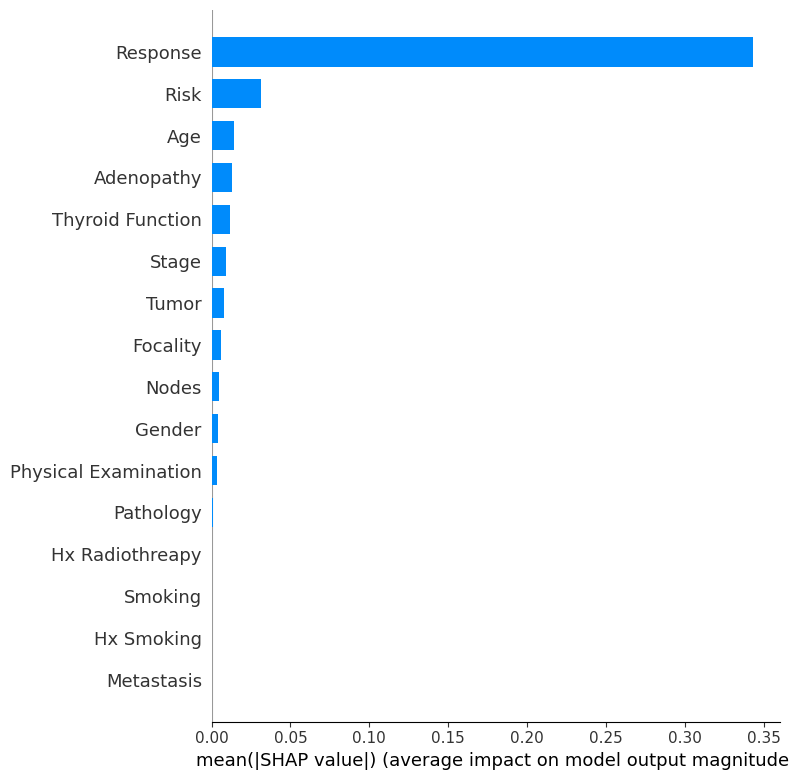

In [33]:
shap.summary_plot(shap_values,X_test,plot_type='bar')

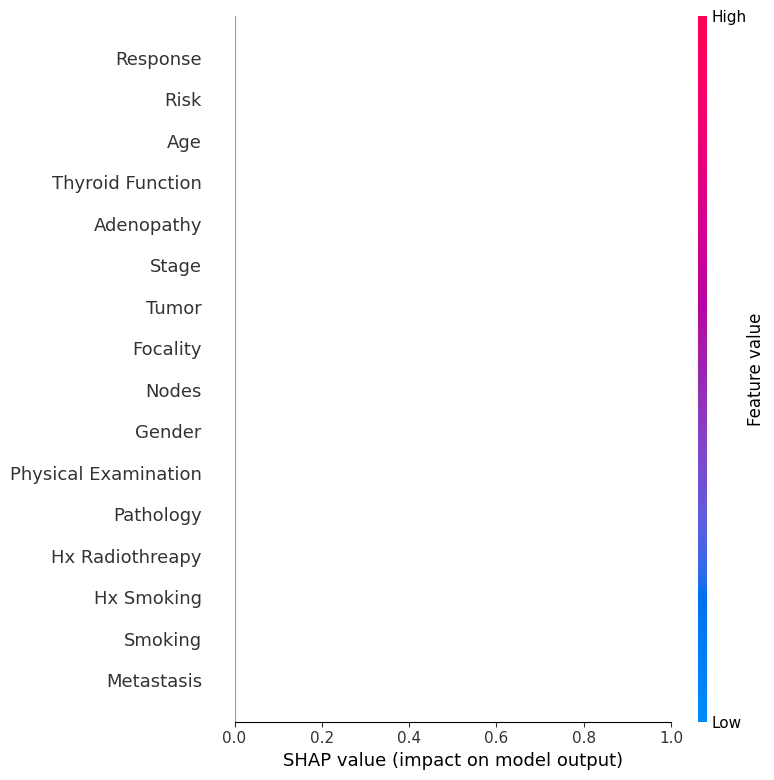

In [78]:
# prompt: Shap plot beeswarm plot

shap.summary_plot(shap_values, X_test, plot_type='beeswarm')


In [74]:
import lime
import lime.lime_tabular

In [75]:
#define the expaliner
expaliner=lime.lime_tabular.LimeTabularExplainer(np.array(X_train),feature_names=np.array(X_train.columns),
                                                class_names=np.array([0,1]),discretize_continuous=True)

In [76]:
#Explain an instance
instance=np.random.randint(0,np.array(X_test).shape[0])
exp=expaliner.explain_instance(np.array(X_test)[instance],random_forest.predict_proba,num_features=5,top_labels=1)

In [77]:
exp.show_in_notebook(show_table=True,show_all=False)

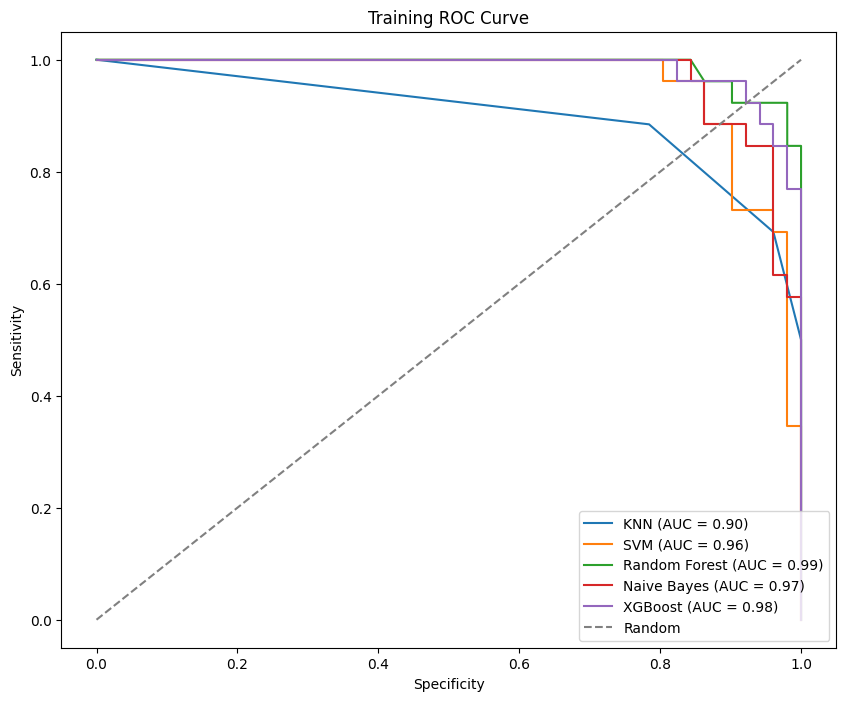

In [45]:

# Define the classifiers
classifiers = [
    ("KNN", KNeighborsClassifier()),
    ("SVM", SVC(probability=True)),
    ("Random Forest", RandomForestClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("XGBoost", XGBClassifier())
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))

for name, clf in classifiers:
    clf.fit(X_train, y_train)

    # Predict probabilities
    y_scores = clf.predict_proba(X_test)[:, 1]

    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Calculate Specificity and Sensitivity
    specificity = 1 - fpr
    sensitivity = tpr

    # Plot ROC curve
    plt.plot(specificity, sensitivity, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot diagonal line representing random chance
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

# Customize the plot
plt.title('Training ROC Curve')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc='lower right')

# Show the plot
plt.show()

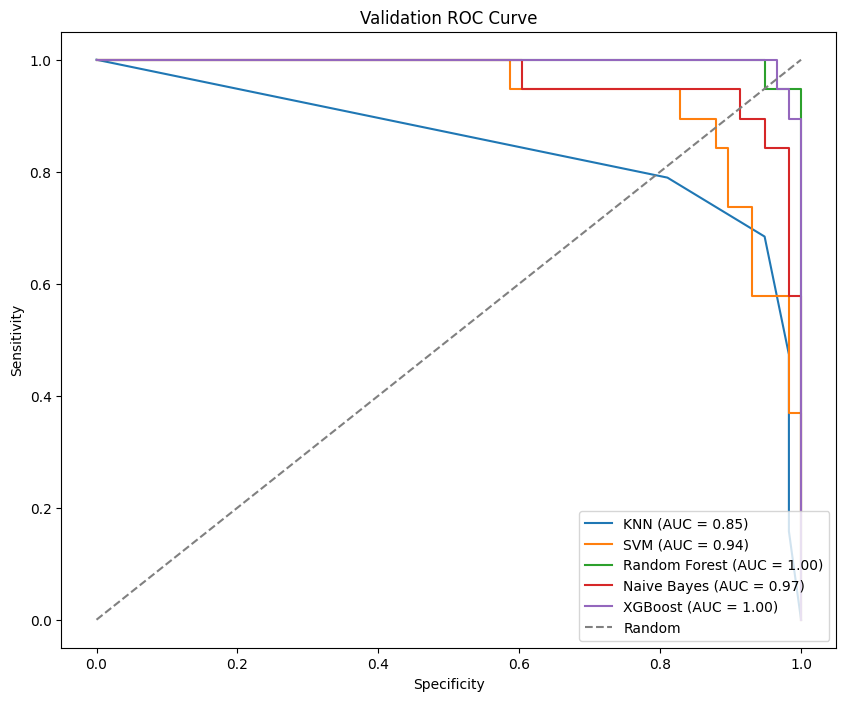

In [46]:
# Assuming you have your data and labels loaded, replace X and y with your data and labels
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifiers
classifiers = [
    ("KNN", KNeighborsClassifier()),
    ("SVM", SVC(probability=True)),
    ("Random Forest", RandomForestClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("XGBoost", XGBClassifier())
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))

for name, clf in classifiers:
    clf.fit(X_train, y_train)

    # Predict probabilities on validation set
    y_scores_val = clf.predict_proba(X_val)[:, 1]

    # Compute ROC curve and area under the curve for validation set
    fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_scores_val)
    roc_auc_val = auc(fpr_val, tpr_val)

    # Calculate Specificity and Sensitivity for validation set
    specificity_val = 1 - fpr_val
    sensitivity_val = tpr_val

    # Plot ROC curve for validation set
    plt.plot(specificity_val, sensitivity_val, label=f'{name} (AUC = {roc_auc_val:.2f})')

# Plot diagonal line representing random chance
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

# Customize the plot
plt.title('Validation ROC Curve')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [56]:
from tabulate import tabulate
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score, f1_score, roc_curve
from scipy.stats import sem, t

 #Define the classifiers
classifiers = [
    ("KNN", KNeighborsClassifier()),
    ("SVM", SVC(probability=True)),
    ("Random Forest", RandomForestClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("XGBoost", XGBClassifier())
]

# Initialize lists to store results
results = []

# Loop through each classifier
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    y_scores = clf.predict_proba(X_train)[:, 1]

    # Compute metrics
    auc_score = roc_auc_score(y_train, y_scores)
    accuracy = accuracy_score(y_train, y_pred)
    sensitivity = recall_score(y_train, y_pred)
    specificity = precision_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)

    # Calculate 95% confidence interval for AUC using bootstrapping
    aucs = []
    np.random.seed(42)  # for reproducibility
    for _ in range(1000):
        indices = np.random.choice(len(y_train), len(y_train), replace=True)
        bootstrapped_scores = roc_auc_score(y_train.iloc[indices], y_scores[indices])
        aucs.append(bootstrapped_scores)

    auc_ci_lower, auc_ci_upper = np.percentile(aucs, [2.5, 97.5])

    # Append results to the list
    results.append([name, f"{auc_score:.2f} ({auc_ci_lower:.2f}-{auc_ci_upper:.2f})",
                    f"{accuracy:.2f}", f"{sensitivity:.2f}", f"{specificity:.2f}", f"{f1:.2f}"])

# Create and print the table
headers = ["Model", "AUC (95%CI)", "Accuracy (95%CI)", "Sensitivity (95%CI)", "Specificity (95%CI)", "F1 Score (95%CI)"]
table = tabulate(results, headers, tablefmt="grid")
print(table)


+---------------+------------------+--------------------+-----------------------+-----------------------+--------------------+
| Model         | AUC (95%CI)      |   Accuracy (95%CI) |   Sensitivity (95%CI) |   Specificity (95%CI) |   F1 Score (95%CI) |
+===============+==================+====================+=======================+=======================+====================+
| KNN           | 0.97 (0.96-0.99) |               0.91 |                  0.73 |                  0.96 |               0.83 |
+---------------+------------------+--------------------+-----------------------+-----------------------+--------------------+
| SVM           | 0.91 (0.88-0.94) |               0.76 |                  0.24 |                  0.84 |               0.37 |
+---------------+------------------+--------------------+-----------------------+-----------------------+--------------------+
| Random Forest | 1.00 (1.00-1.00) |               1    |                  1    |                  1    |      

In [57]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [58]:
classifiers = [
    ("KNN", KNeighborsClassifier()),
    ("SVM", SVC(probability=True)),
    ("Random Forest", RandomForestClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("XGBoost", XGBClassifier())
]

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # You can adjust the number of splits as needed

# Loop through each classifier
for name, clf in classifiers:
    # Perform cross-validation for ROC-AUC
    roc_auc_scores = cross_val_score(clf, X, y, cv=cv, scoring='roc_auc')

    # Print results
    print(f"{name} - ROC-AUC: {np.mean(roc_auc_scores):.2f} (±{np.std(roc_auc_scores):.2f})")

    # You can include other metrics as needed
    # e.g., accuracy, precision, recall
    accuracy_scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    precision_scores = cross_val_score(clf, X, y, cv=cv, scoring='precision')
    recall_scores = cross_val_score(clf, X, y, cv=cv, scoring='recall')

    print(f"{name} - Accuracy: {np.mean(accuracy_scores):.2f} (±{np.std(accuracy_scores):.2f})")
    print(f"{name} - Precision: {np.mean(precision_scores):.2f} (±{np.std(precision_scores):.2f})")
    print(f"{name} - Recall: {np.mean(recall_scores):.2f} (±{np.std(recall_scores):.2f})")
    print("\n")

KNN - ROC-AUC: 0.89 (±0.03)
KNN - Accuracy: 0.86 (±0.03)
KNN - Precision: 0.93 (±0.07)
KNN - Recall: 0.55 (±0.08)


SVM - ROC-AUC: 0.91 (±0.02)
SVM - Accuracy: 0.77 (±0.03)
SVM - Precision: 0.79 (±0.10)
SVM - Recall: 0.23 (±0.08)


Random Forest - ROC-AUC: 0.98 (±0.01)
Random Forest - Accuracy: 0.96 (±0.02)
Random Forest - Precision: 0.97 (±0.03)
Random Forest - Recall: 0.89 (±0.08)


Naive Bayes - ROC-AUC: 0.96 (±0.01)
Naive Bayes - Accuracy: 0.90 (±0.03)
Naive Bayes - Precision: 0.88 (±0.05)
Naive Bayes - Recall: 0.74 (±0.09)


XGBoost - ROC-AUC: 0.99 (±0.01)
XGBoost - Accuracy: 0.96 (±0.02)
XGBoost - Precision: 0.94 (±0.05)
XGBoost - Recall: 0.92 (±0.05)




In [59]:
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from tabulate import tabulate



# Define the classifiers
classifiers = [
    ("KNN", KNeighborsClassifier()),
    ("SVM", SVC(probability=True)),
    ("Random Forest", RandomForestClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("XGBoost", XGBClassifier())
]

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # You can adjust the number of splits as needed

# Initialize lists to store results
results = []

# Loop through each classifier
for name, clf in classifiers:
    # Perform cross-validation for ROC-AUC
    roc_auc_scores = cross_val_score(clf, X, y, cv=cv, scoring='roc_auc')

    # Perform cross-validation for other metrics
    accuracy_scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    sensitivity_scores = cross_val_score(clf, X, y, cv=cv, scoring='recall')
    specificity_scores = cross_val_score(clf, X, y, cv=cv, scoring='precision')
    f1_scores = cross_val_score(clf, X, y, cv=cv, scoring='f1')

    # Calculate 95% confidence intervals for each metric
    accuracy_ci = np.percentile(accuracy_scores, [2.5, 97.5])
    sensitivity_ci = np.percentile(sensitivity_scores, [2.5, 97.5])
    specificity_ci = np.percentile(specificity_scores, [2.5, 97.5])
    f1_ci = np.percentile(f1_scores, [2.5, 97.5])

    # Append results to the list
    results.append([name, f"{np.mean(roc_auc_scores):.2f} (±{np.std(roc_auc_scores):.2f})",
                    f"{np.mean(accuracy_scores):.2f} (±{np.std(accuracy_scores):.2f})",
                    f"{np.mean(sensitivity_scores):.2f} (±{np.std(sensitivity_scores):.2f})",
                    f"{np.mean(specificity_scores):.2f} (±{np.std(specificity_scores):.2f})",
                    f"{np.mean(f1_scores):.2f} (±{np.std(f1_scores):.2f})"])

# Create and print the table
headers = ["Model", "ROC-AUC (95%CI)", "Accuracy (95%CI)", "Sensitivity (95%CI)", "Specificity (95%CI)", "F1 Score (95%CI)"]
table = tabulate(results, headers, tablefmt="grid")
print(table)


+---------------+-------------------+--------------------+-----------------------+-----------------------+--------------------+
| Model         | ROC-AUC (95%CI)   | Accuracy (95%CI)   | Sensitivity (95%CI)   | Specificity (95%CI)   | F1 Score (95%CI)   |
+===============+===================+====================+=======================+=======================+====================+
| KNN           | 0.89 (±0.03)      | 0.86 (±0.03)       | 0.55 (±0.08)          | 0.93 (±0.07)          | 0.69 (±0.07)       |
+---------------+-------------------+--------------------+-----------------------+-----------------------+--------------------+
| SVM           | 0.91 (±0.02)      | 0.77 (±0.03)       | 0.23 (±0.08)          | 0.79 (±0.10)          | 0.35 (±0.11)       |
+---------------+-------------------+--------------------+-----------------------+-----------------------+--------------------+
| Random Forest | 0.99 (±0.02)      | 0.96 (±0.02)       | 0.90 (±0.08)          | 0.98 (±0.02)         

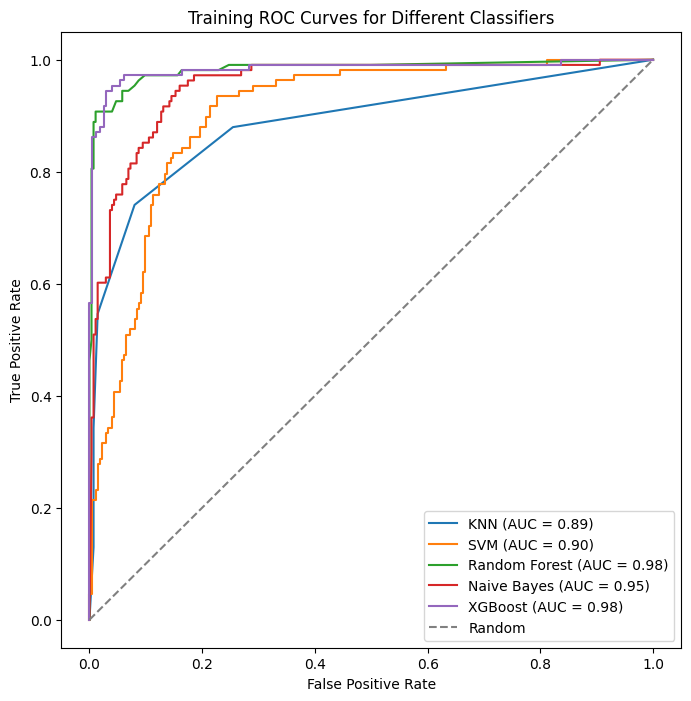

+---------------+-------------------+--------------------+-----------------------+-----------------------+--------------------+
| Model         | ROC-AUC (95%CI)   | Accuracy (95%CI)   | Sensitivity (95%CI)   | Specificity (95%CI)   | F1 Score (95%CI)   |
+===============+===================+====================+=======================+=======================+====================+
| KNN           | 0.89 (±0.00)      | 0.86 (±0.03)       | 0.55 (±0.08)          | 0.93 (±0.07)          | 0.69 (±0.07)       |
+---------------+-------------------+--------------------+-----------------------+-----------------------+--------------------+
| SVM           | 0.90 (±0.00)      | 0.77 (±0.03)       | 0.23 (±0.08)          | 0.79 (±0.10)          | 0.35 (±0.11)       |
+---------------+-------------------+--------------------+-----------------------+-----------------------+--------------------+
| Random Forest | 0.98 (±0.00)      | 0.96 (±0.01)       | 0.90 (±0.08)          | 0.97 (±0.02)         

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, recall_score, precision_score, f1_score
from tabulate import tabulate

# Assuming you have your data and labels loaded, replace X and y with your data and labels
# X, y = ...

# Define the classifiers
classifiers = [
    ("KNN", KNeighborsClassifier()),
    ("SVM", SVC(probability=True)),
    ("Random Forest", RandomForestClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("XGBoost", XGBClassifier())
]

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # You can adjust the number of splits as needed

# Initialize lists to store results
results = []

# Create a single plot for ROC curves
plt.figure(figsize=(8, 8))

# Loop through each classifier
for name, clf in classifiers:
    # Get predicted probabilities using cross-validation
    y_scores = cross_val_predict(clf, X, y, cv=cv, method="predict_proba")[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    # Perform cross-validation for other metrics
    accuracy_scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    sensitivity_scores = cross_val_score(clf, X, y, cv=cv, scoring='recall')
    specificity_scores = cross_val_score(clf, X, y, cv=cv, scoring='precision')
    f1_scores = cross_val_score(clf, X, y, cv=cv, scoring='f1')

    # Calculate 95% confidence intervals for each metric
    accuracy_ci = np.percentile(accuracy_scores, [2.5, 97.5])
    sensitivity_ci = np.percentile(sensitivity_scores, [2.5, 97.5])
    specificity_ci = np.percentile(specificity_scores, [2.5, 97.5])
    f1_ci = np.percentile(f1_scores, [2.5, 97.5])

    # Append results to the list
    results.append([name, f"{roc_auc:.2f} (±{np.std([roc_auc]):.2f})",
                    f"{np.mean(accuracy_scores):.2f} (±{np.std(accuracy_scores):.2f})",
                    f"{np.mean(sensitivity_scores):.2f} (±{np.std(sensitivity_scores):.2f})",
                    f"{np.mean(specificity_scores):.2f} (±{np.std(specificity_scores):.2f})",
                    f"{np.mean(f1_scores):.2f} (±{np.std(f1_scores):.2f})"])

# Customize the plot
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Training ROC Curves for Different Classifiers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Create and print the table
headers = ["Model", "ROC-AUC (95%CI)", "Accuracy (95%CI)", "Sensitivity (95%CI)", "Specificity (95%CI)", "F1 Score (95%CI)"]
table = tabulate(results, headers, tablefmt="grid")
print(table)


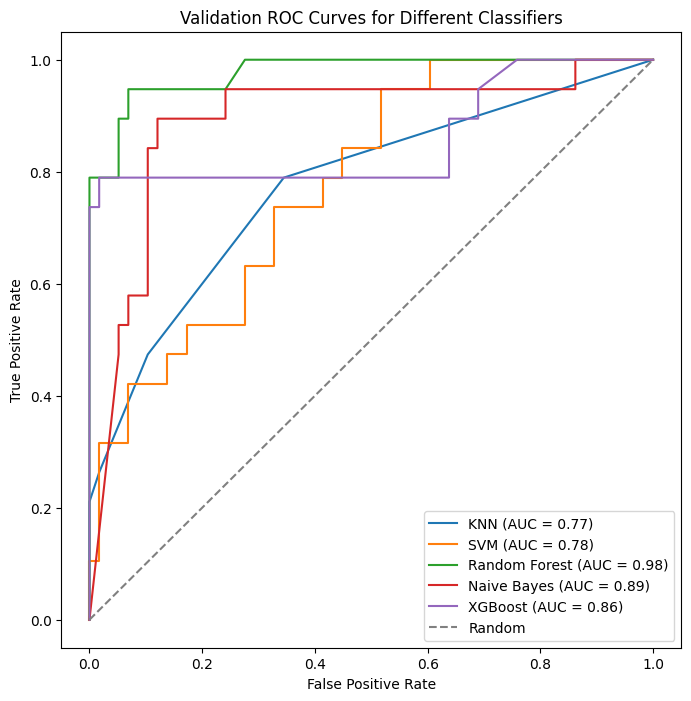

+---------------+-------------------+--------------------+-----------------------+-----------------------+--------------------+
| Model         | ROC-AUC (95%CI)   | Accuracy (95%CI)   | Sensitivity (95%CI)   | Specificity (95%CI)   | F1 Score (95%CI)   |
+===============+===================+====================+=======================+=======================+====================+
| KNN           | 0.77 (±0.00)      | 0.81 (±0.07)       | 0.25 (±0.22)          | 0.60 (±0.49)          | 0.35 (±0.30)       |
+---------------+-------------------+--------------------+-----------------------+-----------------------+--------------------+
| SVM           | 0.78 (±0.00)      | 0.79 (±0.06)       | 0.20 (±0.19)          | 0.60 (±0.49)          | 0.29 (±0.26)       |
+---------------+-------------------+--------------------+-----------------------+-----------------------+--------------------+
| Random Forest | 0.98 (±0.00)      | 0.93 (±0.06)       | 0.77 (±0.24)          | 1.00 (±0.00)         

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from tabulate import tabulate

#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = [
    ("KNN", KNeighborsClassifier()),
    ("SVM", SVC(probability=True)),
    ("Random Forest", RandomForestClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("XGBoost", XGBClassifier())
]

# Set up cross-validation for validation set
cv_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # You can adjust the number of splits as needed

# Initialize lists to store results
results = []

# Create a single plot for ROC curves
plt.figure(figsize=(8, 8))

# Loop through each classifier
for name, clf in classifiers:
    # Fit the model on the training data
    clf.fit(X_train, y_train)

    # Get predicted probabilities using the validation set
    y_scores = cross_val_predict(clf, X_val, y_val, cv=cv_val, method="predict_proba")[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_val, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    # Perform cross-validation for other metrics on the validation set
    accuracy_scores = cross_val_score(clf, X_val, y_val, cv=cv_val, scoring='accuracy')
    sensitivity_scores = cross_val_score(clf, X_val, y_val, cv=cv_val, scoring='recall')
    specificity_scores = cross_val_score(clf, X_val, y_val, cv=cv_val, scoring='precision')
    f1_scores = cross_val_score(clf, X_val, y_val, cv=cv_val, scoring='f1')

    # Calculate 95% confidence intervals for each metric
    accuracy_ci = np.percentile(accuracy_scores, [2.5, 97.5])
    sensitivity_ci = np.percentile(sensitivity_scores, [2.5, 97.5])
    specificity_ci = np.percentile(specificity_scores, [2.5, 97.5])
    f1_ci = np.percentile(f1_scores, [2.5, 97.5])

    # Append results to the list
    results.append([name, f"{roc_auc:.2f} (±{np.std([roc_auc]):.2f})",
                    f"{np.mean(accuracy_scores):.2f} (±{np.std(accuracy_scores):.2f})",
                    f"{np.mean(sensitivity_scores):.2f} (±{np.std(sensitivity_scores):.2f})",
                    f"{np.mean(specificity_scores):.2f} (±{np.std(specificity_scores):.2f})",
                    f"{np.mean(f1_scores):.2f} (±{np.std(f1_scores):.2f})"])

# Customize the plot
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Validation ROC Curves for Different Classifiers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Create and print the table
headers = ["Model", "ROC-AUC (95%CI)", "Accuracy (95%CI)", "Sensitivity (95%CI)", "Specificity (95%CI)", "F1 Score (95%CI)"]
table = tabulate(results, headers, tablefmt="grid")
print(table)
